## Visualization using PCA and t-SNE

![](https://scontent-icn1-1.xx.fbcdn.net/v/t1.0-9/41425661_1809264752526756_3946431284045152256_n.jpg?_nc_cat=107&oh=e0b118959eaf0d6c7c97ce71b8c1136d&oe=5C20EDF1)

Let's get `torchtext`, every PyTorch NLP researcher's friend:

In [12]:
!pip install torchtext==0.3.1

`torchtext` comes batteries included. We'll be using the pre-trained [FastText](https://fasttext.cc/) embeddings.

In [13]:
import torch
import torchtext
fasttext = torchtext.vocab.FastText(language='simple')

Why `'simple'`? Becasue it's the fastest to download.

In [2]:
fasttext['love']

tensor([-0.1162, -0.3368,  0.0646, -0.1196,  0.2792, -0.1027, -0.0441,  0.1187,
         0.1974,  0.3104, -0.6503,  0.2812,  0.1546,  0.0414, -0.0756, -0.5767,
         0.0940,  0.0120, -0.2069, -0.1647,  0.1561,  0.2677,  0.0166, -0.1659,
        -0.2500, -0.1366,  0.0829, -0.3483, -0.2668,  0.0247, -0.1616, -0.1894,
        -0.0059,  0.8015,  0.0005, -0.1111, -0.2273,  0.2643,  0.3206, -0.0462,
        -0.3165,  0.4295, -0.0294,  0.1510, -0.1353, -0.1552, -0.0141,  0.0314,
         0.1614,  0.1807,  0.1207, -0.0187, -0.3111,  0.0923, -0.3743, -0.0012,
         0.1224,  0.0746,  0.0089,  0.2788,  0.0287,  0.1806, -0.1615,  0.0340,
        -0.0070, -0.1922, -0.4078,  0.0999,  0.1594,  0.3372,  0.1215,  0.5370,
        -0.1502,  0.2673,  0.0122, -0.1455,  0.1890,  0.0073,  0.3634, -0.0266,
        -0.3836,  0.2223,  0.2919, -0.5617, -0.1203,  0.3049, -0.1361, -0.5936,
        -0.2371, -0.4368, -0.1942,  0.2925, -0.6426, -0.0988,  0.0325,  0.0987,
        -0.6028,  0.2428,  0.0724,  0.01

In [3]:
fasttext.vectors.size()

torch.Size([111051, 300])

Our nano-sized corpus for the day:

In [6]:
NANO_CORPUS = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

corpus = NANO_CORPUS.lower().replace(',', ' ').replace('.', ' ').split()
vocabulary = list(set(corpus))
print(vocabulary)

['beings', 'spells', 'evolution', 'that', 'as', 'manipulate', 'effect', 'to', 'data', 'conjure', 'process', 'other', 'programs', 'idea', 'are', 'we', 'called', 'abstract', 'evolve', 'computational', 'direct', 'with', 'processes', 'our', 'spirits', 'computers', 'study', 'directed', 'program', 'in', 'a', 'of', 'inhabit', 'create', 'about', 'is', 'they', 'people', 'the', 'things', 'computer', 'rules', 'by', 'pattern']


## PCA

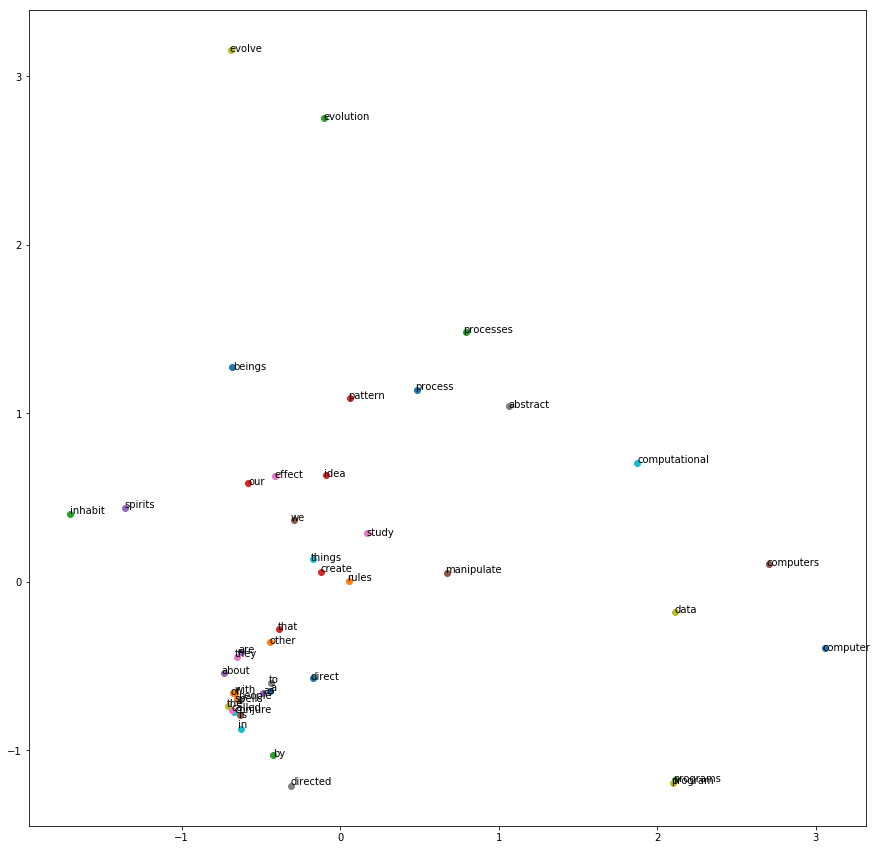

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def pca(vocabulary, embeddings, n_points):
    np.random.seed(0)
    
    data = torch.stack([embeddings[word] for word in vocabulary])
    
    pca = PCA(n_components=2, random_state=0)
    with torch.no_grad():
        results = pca.fit_transform(data)
    
    plt.figure(figsize=(15, 15))
    for i in range(len(vocabulary)):
        query = vocabulary[i]
        x, y = results[i]
        plt.scatter(x, y, label=query)
        
        # Prevent label overlapping by applying random offsets.
        offset_x = np.random.randint(-35, 12) / 2000
        offset_y = np.random.randint(-30, 15) / 2000
        
        plt.annotate(query, (x + offset_x, y + offset_y))
        
    plt.show()
    
pca(vocabulary, fasttext, 100)

The problem:

![](1.png)

(from https://www.youtube.com/watch?v=NEaUSP4YerM)

## t-SNE

![](2.png)
![](3.png)

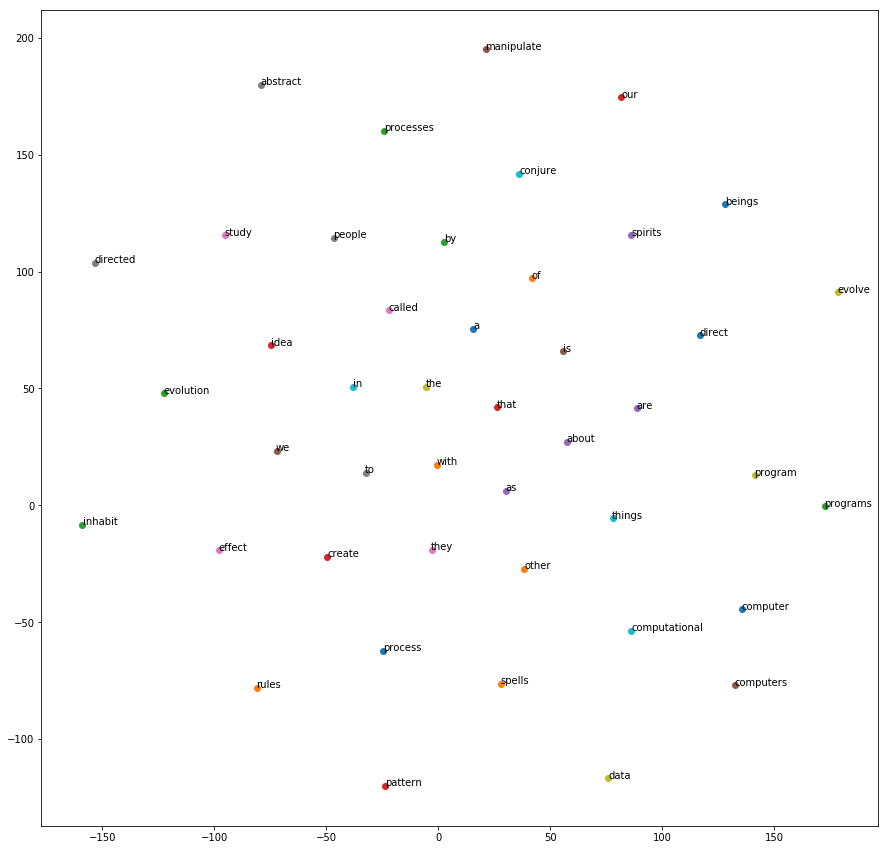

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
    
def tsne(vocabulary, embeddings):
    np.random.seed(0)

    data = torch.stack([embeddings[word] for word in vocabulary])

    tsne = TSNE(n_components=2, random_state=0, n_iter=5000)
    
    with torch.no_grad():
        results = tsne.fit_transform(data)
    
    plt.figure(figsize=(15, 15))
    
    for i, word in enumerate(vocabulary):
        x, y = results[i]
        plt.scatter(x, y, label=word)
        
        # Prevent label overlapping by applying random offsets.
        offset_x = np.random.randint(-35, 12) / 100
        offset_y = np.random.randint(-30, 15) / 100
        
        plt.annotate(word, (x + offset_x, y + offset_y))
        
    plt.show()

tsne(vocabulary, fasttext)

## Wrap-up

* PCA
  * good for dimensionality reduction
  * not always good for visualization
  * weak against non-linear data
  
* t-SNE
  * good for visualization
  * not so good for dimensionality reduction
  * strong against non-linear data